In [54]:
# primero necesitaremos instalar unos paketes en anaconda 
#pip install chart-studio
#pip install python-igraph


In [55]:
#importamos las 
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import chart_studio.plotly
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 
from IPython.display import display
from PIL import Image

In [56]:
#cargamos las bases de datos y les asignamos su nombre 
nodes= pd.read_csv('C:/Users/Castro Reyes/Desktop/VisualAnalytics/nodes.csv') 
hnk= pd.read_csv('C:/Users/Castro Reyes/Desktop/VisualAnalytics/hero-network.csv') 
edges= pd.read_csv('C:/Users/Castro Reyes/Desktop/VisualAnalytics/edges.csv')

In [57]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96104 entries, 0 to 96103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hero    96104 non-null  object
 1   comic   96104 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [58]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   node    19090 non-null  object
 1   type    19090 non-null  object
dtypes: object(2)
memory usage: 298.4+ KB


In [62]:
hnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   574467 non-null  object
 1   hero2   574467 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [65]:
RR = nx.from_pandas_edgelist(hnk, source = "hero1", target = "hero2")
nx.info(RR)

'Name: \nType: Graph\nNumber of nodes: 6426\nNumber of edges: 167219\nAverage degree:  52.0445'

In [68]:
hnk= hnk.iloc[:1000,:2]
RR = nx.from_pandas_edgelist(hnk, source = "hero1", target = "hero2")
print(nx.info(RR))

Name: 
Type: Graph
Number of nodes: 87
Number of edges: 771
Average degree:  17.7241


In [88]:
import igraph as ig
nodes = RR.number_of_nodes()
edge= RR.number_of_edges()
nomre_edge = [f for f in RR.edges()] 

E= nx.convert_node_labels_to_integers(RR) 
E = [f for f in E.edges()]

Gra = ig.Graph(E, directed = False)
layt = Gra.layout('kk',dim = 3)  

Xn=[layt[k][0] for k in range(nodes)]# x coordenadas 
Yn=[layt[k][1] for k in range(nodes)]# y coordenadas 
Zn=[layt[k][2] for k in range(nodes)]# z coordenadas
Xe=[]
Ye=[]
Ze=[]

#Grouping Coordinates
for f in E:
    Xe+=[layt[f[0]][0],layt[f[1]][0], None]# coordenadas x de los extremos del borde
    Ye+=[layt[f[0]][1],layt[f[1]][1], None]
    Ze+=[layt[f[0]][2],layt[f[1]][2], None]
    
#Nodes Name 
labels = []
group = []

for i in range(len(nomre_edge )):
    valor = nomre_edge[i][0]
    labels.append(valor)
    
for i in range(len(E)):
    valor = E[i][0]
    group.append(valor)
    
group =[]
group.extend(np.repeat(1,200))
group.extend(np.repeat(2,200))
group.extend(np.repeat(3,300))
group.extend(np.repeat(4,100))
group.extend(np.repeat(5,200))

trace1=go.Scatter3d(x=Xe,y=Ye,z=Ze,mode='lines',
                    line=dict(color='rgb(120,120,120)', width=1),hoverinfo='none')

trace2=go.Scatter3d(x=Xn,y=Yn,z=Zn,mode='markers',name='SuperHeroe',
                    marker=dict(symbol='circle',size=4,color=group,colorscale='earth',line=dict(color='rgb(60,60,60)', width=0.5)),
                    text=labels,hoverinfo='text')

axis=dict(showbackground=False,showline=False,zeroline=False,
          showgrid=False,showticklabels=False,title='')


In [89]:
layout = go.Layout(
         title="Red de aparición de Marvel y SuperHeroes 3D",
    autosize=True,
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
         dict(
           showarrow=False,
            text="JHON CASTRO",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()

### Que 
nuestro usiario en esta visualizacion puede ver datos de sus personajes en la industria de marvel y sus conexiones, a el usuario le proporcionamos datos cualitativos como lo es el nombre de los personajes en este caso, a plena vista vemos como los datos pueden ser considerados como dos grupos distintos, pero si agregamos mas conexiones seudo aleatorias podriamos observar como toma una forma mas esferica. estos datos nos permiten ver las conexiones de los distintos personajes a traves de las sagas y travesias de los distintos personajes en el mundo de marvel.



### por que 

el usuario requiere localizar las posciciones de los diferentes personajes para interactuar con sus personajes favoritos y asi poder tener un seguimiento de ellos, asi como tambien puede agregarle seudoaleatoridad incluyendo mas datos para que la red sea mucho mayor y poder obtener mas informacion de ellos, indague la manera correcta de poner las conexiones de los personajes en numero cuantitativo pero no encontre la forma correcta de hacerlo, por lo tanto se seguira el estudio de esta posibilidad.

### como 
utiizamos la red de manera 3d ya que nos permite reducir la oclusion entre los mismos atributos, en nuestro caso la visualizacion requiere de interaccion para poder romper con la oclusion que se puede generar bien sabemos que para estos casos es importante no dejar que los datos se amontonen generando oclusion y perdiendo informacion que podria ser valiosa para el usuario, la caracteristica para estos tipos de datos son de tipo cualitativo aunque nos servirian tambien atributos de forma cuantitativa que nos podrian ayudar perfectamente a mostrar los nodos con mayor participacion o con mayores enlaces en la red.

### marcas y canales 
sabemos que son datos de tipo red donde encontramos que las marcas son de tipo puntos para nodos, marcas de lineas para enlaces en este caso tenemos una posicion espacial de tres dimenciones o tipo 3d, donde tambien podemos explorar la topologia o busquedad de las subestructuras que pueden llegar a tener estos datos,por otro lado tenemos un atributo cualitativo. su posible desventaje la oclusion pero utilizando el grafico 3d podeos explorar y ver mas a detalle los nodos que queremos ver permitiendo tener un indice muy bajo de oclusion. tambien tenemos marcas como el color de los nodos.

### ¿Cumple o no cumple con las reglas?
no cumple con todas las reglas bien sabemos que puede generar conflicto la oclusion y tambien sabemos que entre mas alta sea el salto entre los nodos va a ver mas impresisa su estiamcion, tambien como su forma no es totalmente silindrica y esto se podria considerar como un sesgo ya que son pocos los datos utilizados en la visualizacion


### mejoras posibles 

desde bajo mi punto de vista podria haber mejorado la cantidad de nodos que aparecen en la visualizacion para asi tener un mejor efecto en la visualizacion pero por limites de procesador de mi computador no pude, tambien hubiera mejorado la inormacion implicita en los nodos agregandole la cantidad de conexiones que tienen los nodos unos con los otros, tambien hubiera querido mejorar el tamaño de los nodos segun sus conexiones posibles aunque hubiese sido contraproducente ya que podria generar oclusion entre los datos, tambien hubiera mejorado el color de los nodos y lo hubiera puesto segun el personaje e nodo se veria de un color en especifico o sus conecciones, la visualizacion necesita de interaccion para poder entenderla mejor pero, por lo demas creo que es un buen trabajo.

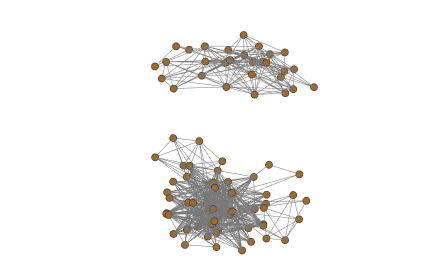

### agrego captura de la visualizacion por si  no carga.